## Assignment 09

### Omkar Gaikwad
### 31126
Data Visualization II
1. Use the inbuilt dataset 'titanic' as used in the above problem. Plot a box plot for distribution
of age with respect to each gender along with the information about whether they survived
or not. (Column names: 'sex' and 'age')
2. Write observations on the inference from the above statistics.

### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

### Importing Dataset

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Cleaning Null Values

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [30]:
df['age'] = df['age'].fillna(df['age'].mean())

In [6]:
deck_mode = df['deck'].mode()[0]
print("Mode of deck is:", deck_mode)
df['deck'] = df['deck'].fillna(deck_mode)

Mode of deck is: C


In [9]:
embarked_mode=df['embarked'].mode()[0]
print("Embarked mode: ", embarked_mode)
df['embarked'] = df['embarked'].fillna(embarked_mode)

Embarked mode:  S


In [10]:
df = df.dropna()
df = df.reset_index()
df = df.drop('index',axis=1)

In [11]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### Plotting Graphs

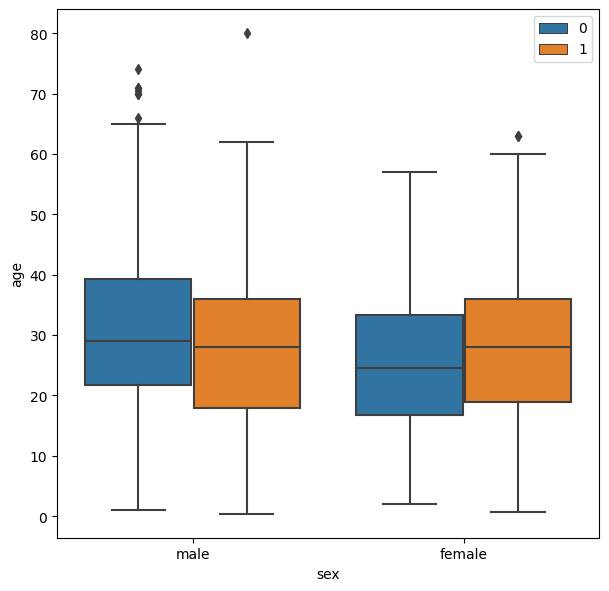

In [26]:
plt.figure(figsize=(7,7),dpi=100)
ax = sns.boxplot(x="sex", y="age", data=df,hue='survived')
plt.legend()
plt.show()

Observations:
1) There are more number of male having age above 65 than female <br>
2) Survival rate of female is more than male <br>
3) More older males could survive than older female

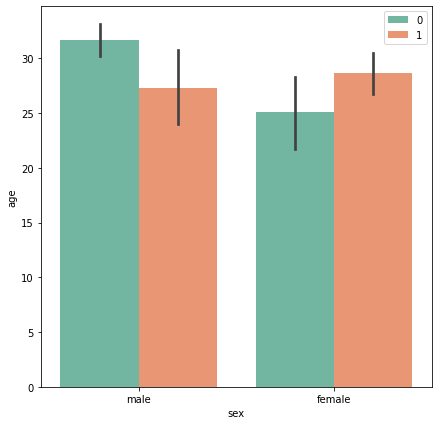

In [27]:
plt.figure(figsize=(7,7))
ax = sns.barplot(data=df, x="sex",y="age",hue='survived', palette="Set2")
plt.legend()
plt.show()

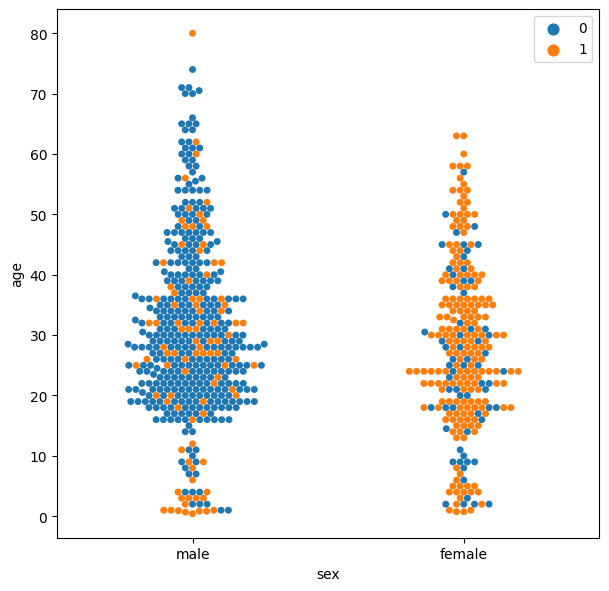

In [15]:
# Draw a categorical scatterplot with non-overlapping points. 
plt.figure(figsize=(7,7),dpi=100)
ax = sns.swarmplot(x="sex",y="age",data=df,hue='survived')
plt.legend()
plt.show()

1) Survival rate of female is more than male

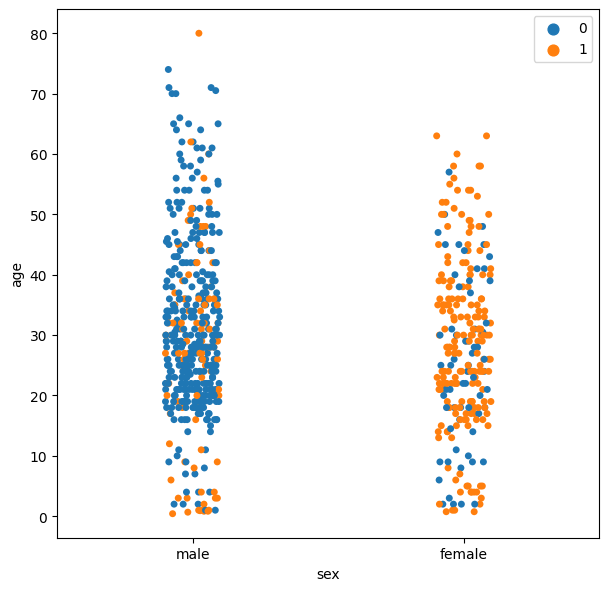

In [34]:
# similar to scatter plot differentiate category
plt.figure(figsize=(7,7),dpi=100)
ax = sns.stripplot(x="sex",y="age",data=df,hue='survived')
plt.legend()
plt.show()

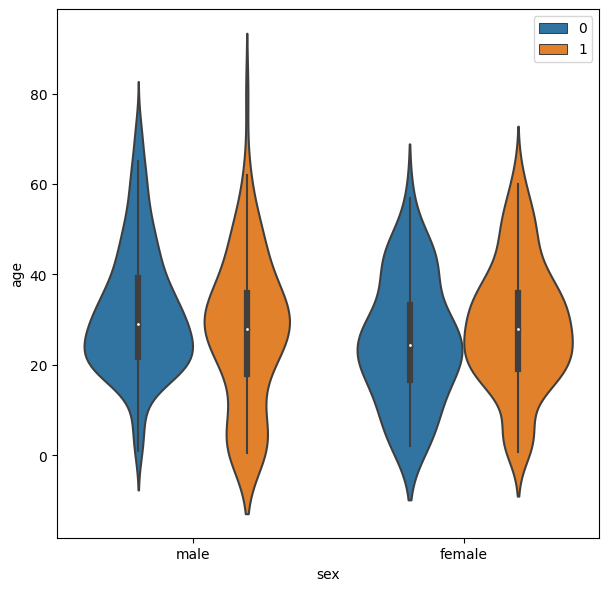

In [30]:
# violin plot features a kernel density estimation of the underlying distribution.
plt.figure(figsize=(7,7),dpi=100)
ax = sns.violinplot(x="sex",y="age",data=df,hue='survived')
plt.legend()
plt.show()

1) Wider section of violine plot represent higher probability that members of the population will take on the given value


- the white dot represents the median
- the thick gray bar in the center represents the interquartile range
- the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.

<Figure size 700x700 with 0 Axes>

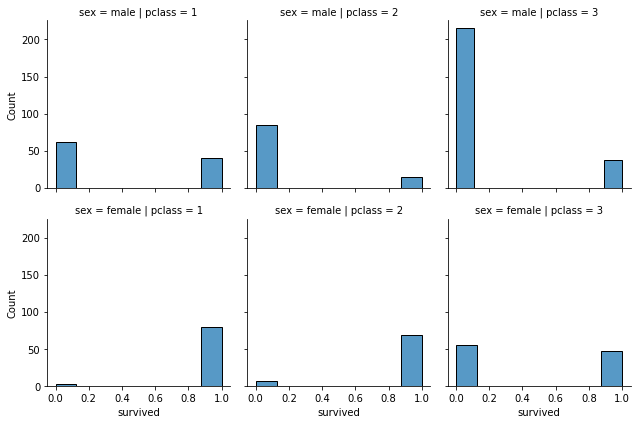

In [29]:
# FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple 
# variables separately within subsets of your dataset using multiple panels.

plt.figure(figsize=(7,7),dpi=100)
ax = sns.FacetGrid(df,col="pclass",  row="sex")
ax.map(sns.histplot,"survived")
plt.show()

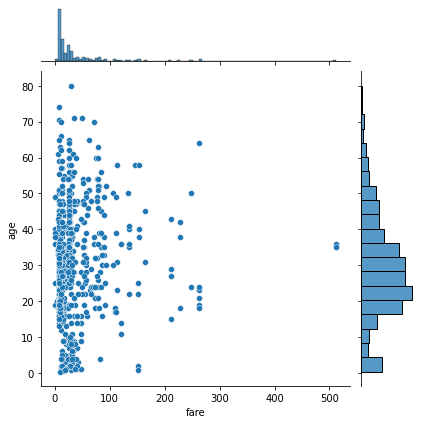

In [33]:
sns.jointplot(x="fare", y="age", data=df)



from above representation: 
1) More number of people having fare below 100 <br>
2) children generally have lower fare rate
